In [3]:
import torch
import deep.model as models
import deep.training as training
from tool.preprocessing import DataCollection
from tool.create_dataset import creation
from deep.training import training_lstm

collection = DataCollection(drop_null=True)
dataset,gt = collection.get_dataset(drop_datetime=False) # in dataset is already present the gt value

NUM_RECORD = 1
TOTAL_DIMENSION = NUM_RECORD*6
division = creation(dataset,NUM_RECORD,p=0.75)

mlp_dataset_X_train= division[0][0].flatten(-2)
mlp_dataset_y_train= division[0][1].flatten(-2)[:,0]
mlp_dataset_X_test = division[1][0].flatten(-2)
mlp_dataset_y_test = division[1][1].flatten(-2)[:,0]

format_dataset =( (mlp_dataset_X_train,mlp_dataset_y_train),(mlp_dataset_X_test,mlp_dataset_y_test))
model = models.AirModel(50,num_fin=TOTAL_DIMENSION).to(torch.device("cuda:0"))

training_lstm(model, torch.device("cuda:0"), format_dataset, num_epochs=200,batch=512,lr=0.0001,lookback=20)


Epoch 0: train RMSE 26.0110, test RMSE 24.4061
Epoch 10: train RMSE 21.8881, test RMSE 19.9455
Epoch 20: train RMSE 20.1916, test RMSE 18.0654
Epoch 30: train RMSE 18.9243, test RMSE 16.6363
Epoch 40: train RMSE 17.8626, test RMSE 15.4169
Epoch 50: train RMSE 16.9632, test RMSE 14.3644
Epoch 60: train RMSE 16.2087, test RMSE 13.4641
Epoch 70: train RMSE 15.5893, test RMSE 12.7107
Epoch 80: train RMSE 15.0949, test RMSE 12.0983
Epoch 90: train RMSE 14.7158, test RMSE 11.6210
Epoch 100: train RMSE 14.4391, test RMSE 11.2677
Epoch 110: train RMSE 14.2480, test RMSE 11.0211
Epoch 120: train RMSE 14.1255, test RMSE 10.8617
Epoch 130: train RMSE 14.0527, test RMSE 10.7670
Epoch 140: train RMSE 14.0126, test RMSE 10.7154
Epoch 150: train RMSE 13.9220, test RMSE 10.6313
Epoch 160: train RMSE 12.3778, test RMSE 9.5147
Epoch 170: train RMSE 11.5975, test RMSE 8.9852
Epoch 180: train RMSE 11.1619, test RMSE 8.7676
Epoch 190: train RMSE 10.8682, test RMSE 8.7261


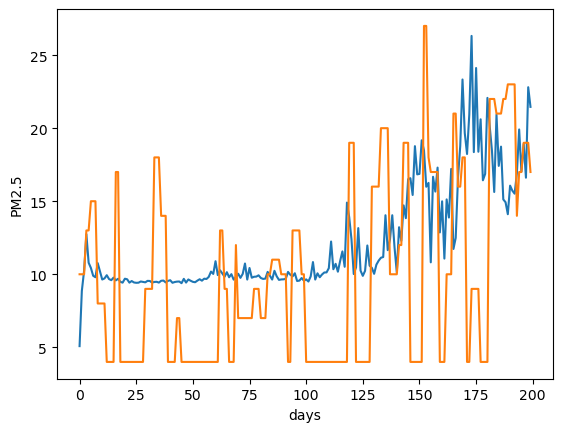

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

ari = collection.ari1952

ari = pd.merge(ari,gt,how="inner", on="valid_at").rename(columns={"pm2p5_y":"pm2p5_t","pm2p5_x":"pm2p5"})

x_test = creation(ari,NUM_RECORD)[1][0].flatten(-2)
y_test = creation(ari,NUM_RECORD)[1][1].flatten(-2)[:,0]

y_test.isnan().sum()
y_pred = model(x_test[:200])
#y_test=y_test.cpu().detach().numpy()[:200]
y_test=y_test[:200]

for impacts in [y_pred,y_test]:
    timefilteredForce = plt.plot(impacts.cpu().detach().numpy())
    timefilteredForce = plt.xlabel('days')
    timefilteredForce = plt.ylabel('PM2.5')

plt.show()

In [15]:
x_test[:200,:].shape

torch.Size([200, 6])

In [7]:
model


AirModel(
  (lstm): LSTM(6, 50, num_layers=2, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)